In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
salesData = pd.read_csv('Sales Dataset.csv')

In [3]:
salesData.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
0,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
1,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12
2,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2021-07-25,Robert Stone,New York,Buffalo,2021-07
3,B-26776,4975,1330,14,Electronics,Printers,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
4,B-26776,4975,1330,14,Electronics,Printers,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12


In [4]:
salesData.shape

(1194, 12)

In [5]:
salesData.isnull().sum()

Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
Order Date      0
CustomerName    0
State           0
City            0
Year-Month      0
dtype: int64

In [6]:
salesData.duplicated().sum()

0

In [7]:
salesData.columns

Index(['Order ID', 'Amount', 'Profit', 'Quantity', 'Category', 'Sub-Category',
       'PaymentMode', 'Order Date', 'CustomerName', 'State', 'City',
       'Year-Month'],
      dtype='object')

In [8]:
salesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1194 non-null   object
 1   Amount        1194 non-null   int64 
 2   Profit        1194 non-null   int64 
 3   Quantity      1194 non-null   int64 
 4   Category      1194 non-null   object
 5   Sub-Category  1194 non-null   object
 6   PaymentMode   1194 non-null   object
 7   Order Date    1194 non-null   object
 8   CustomerName  1194 non-null   object
 9   State         1194 non-null   object
 10  City          1194 non-null   object
 11  Year-Month    1194 non-null   object
dtypes: int64(3), object(9)
memory usage: 112.1+ KB


In [9]:
salesData.describe()

,Amount,Profit,Quantity
count,1194.000000,1194.000000,1194.000000
mean,5178.089615,1348.992462,10.674204
std,2804.921955,1117.992573,5.777102
min,508.000000,50.000000,1.000000
25%,2799.000000,410.000000,6.000000
50%,5152.000000,1014.000000,11.000000
75%,7626.000000,2035.000000,16.000000
max,9992.000000,4930.000000,20.000000


### Time-Series Trends
#### Monthly Sales Trend

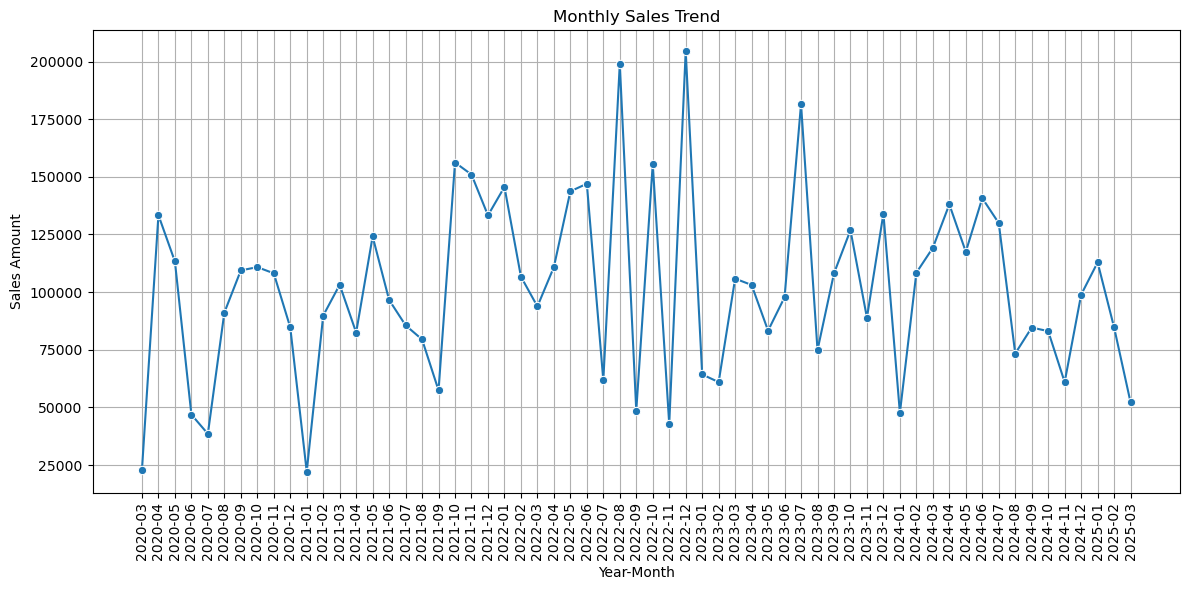

In [10]:
monthly_sales = salesData.groupby('Year-Month')['Amount'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Year-Month', y='Amount', marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.ylabel('Sales Amount')
plt.grid(True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Sales & Profit Over Time (Line Chart)
#### Track performance trends by month.

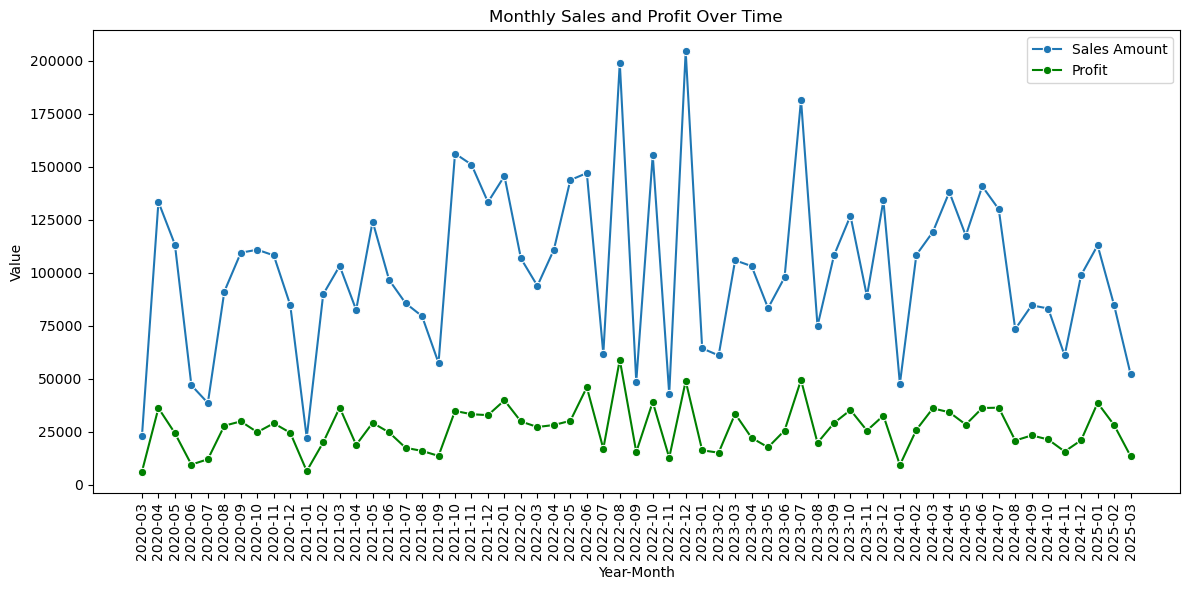

In [11]:
monthly = salesData.groupby('Year-Month')[['Amount', 'Profit']].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly, x='Year-Month', y='Amount', label='Sales Amount', marker='o')
sns.lineplot(data=monthly, x='Year-Month', y='Profit', label='Profit', marker='o', color='green')
plt.title('Monthly Sales and Profit Over Time')
plt.xticks(rotation=90)
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()

### Sales by Category & Sub-Category (Bar Plot)
#### Track performance trends by month.

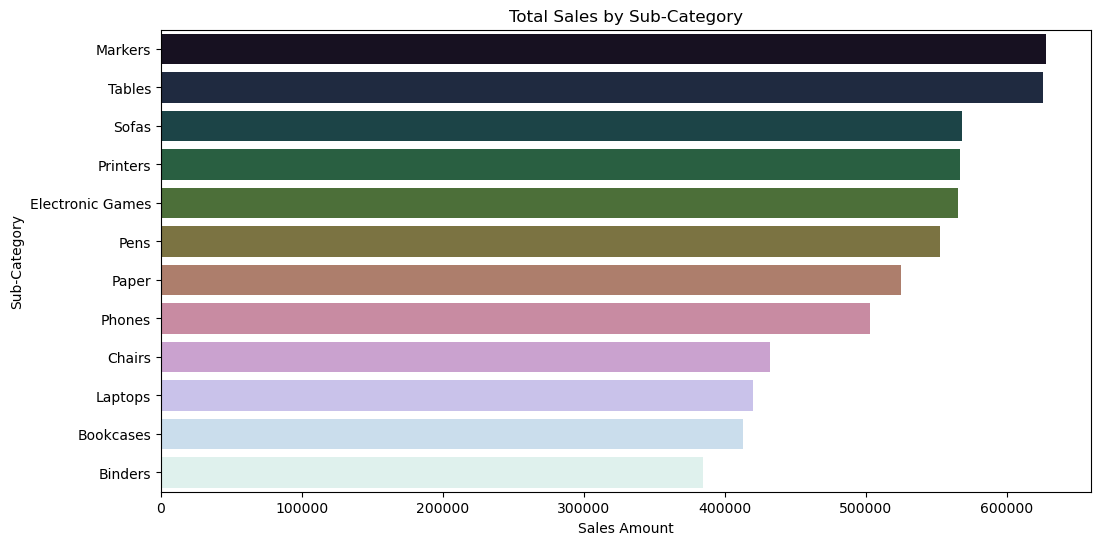

In [12]:
plt.figure(figsize=(12,6))
sns.barplot(data=salesData.groupby('Sub-Category')['Amount'].sum().sort_values(ascending=False).reset_index(),
            x='Amount', y='Sub-Category', palette='cubehelix')
plt.title('Total Sales by Sub-Category')
plt.xlabel('Sales Amount')
plt.ylabel('Sub-Category')
plt.show()

### Profit vs Quantity by Category (Scatter Plot)
#### Check if selling more leads to more profit in each category.

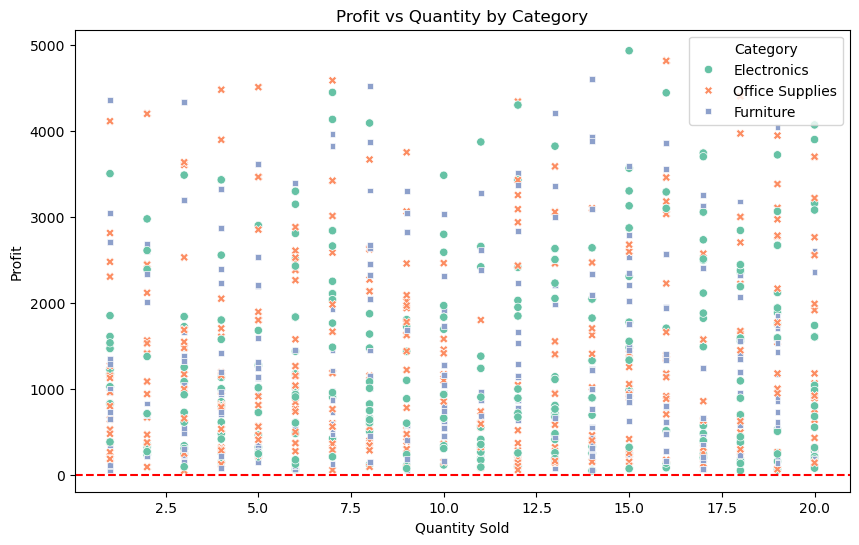

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=salesData, x='Quantity', y='Profit', hue='Category', style='Category', palette='Set2')
plt.title('Profit vs Quantity by Category')
plt.xlabel('Quantity Sold')
plt.ylabel('Profit')
plt.axhline(0, color='red', linestyle='--')
plt.show()

### Top Cities by Total Sales (Horizontal Bar Plot)
#### See which cities bring in the most revenue.

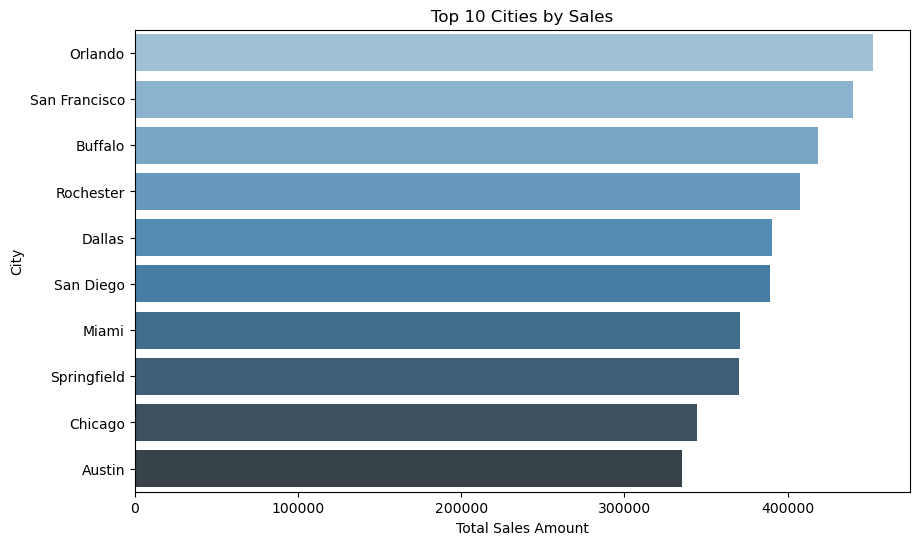

In [14]:
top_cities = salesData.groupby('City')['Amount'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=top_cities, x='Amount', y='City', palette='Blues_d')
plt.title('Top 10 Cities by Sales')
plt.xlabel('Total Sales Amount')
plt.ylabel('City')
plt.show()

### Sales by Payment Mode (Pie Chart or Bar)
#### Understand payment preferences.

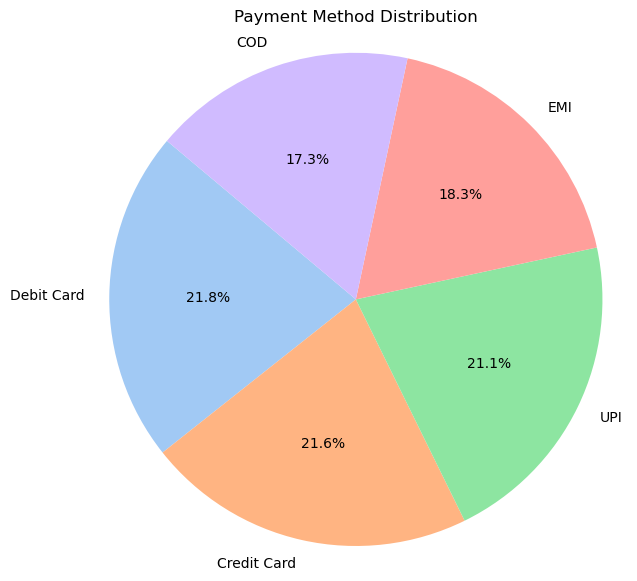

In [15]:
payment = salesData['PaymentMode'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(payment.values, labels=payment.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Payment Method Distribution')
plt.axis('equal')
plt.show()

### Heatmap of Sales by State and Category
#### Visualize product-category performance across regions.

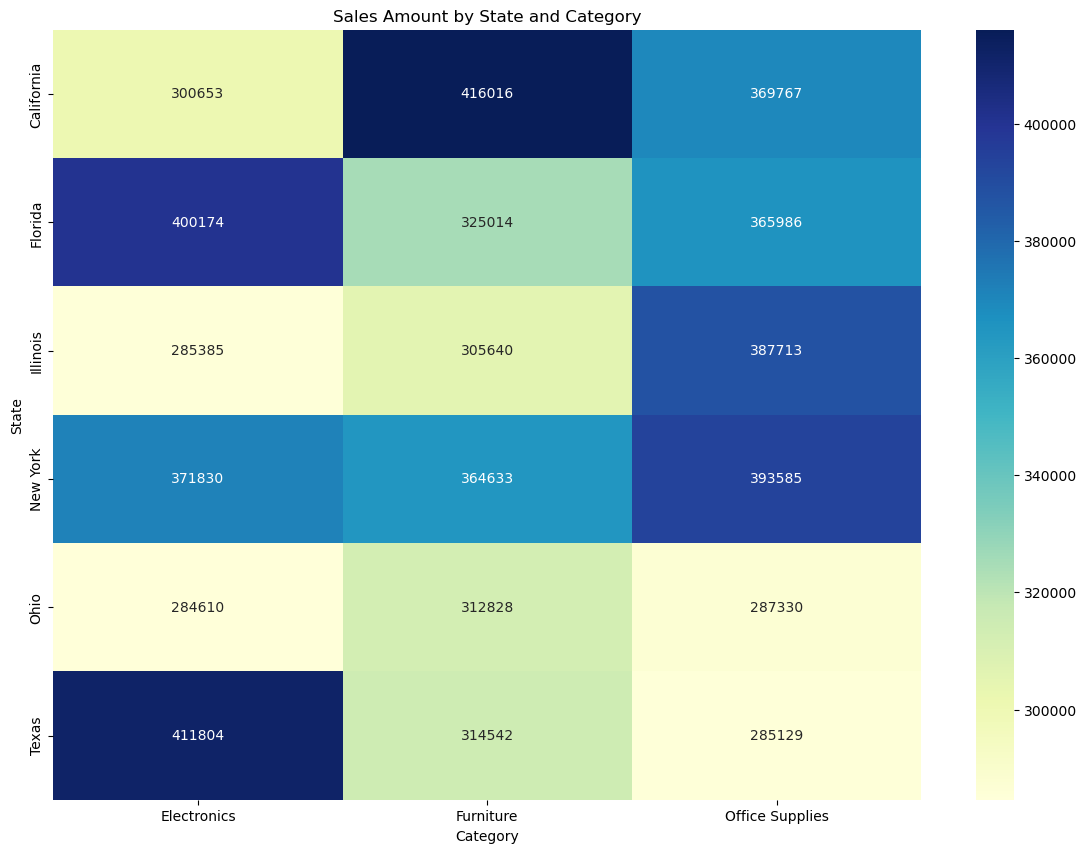

In [16]:
pivot = pd.pivot_table(salesData, values='Amount', index='State', columns='Category', aggfunc='sum', fill_value=0)

plt.figure(figsize=(14,10))
sns.heatmap(pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Sales Amount by State and Category')
plt.ylabel('State')
plt.xlabel('Category')
plt.show()

### Profit Distribution (Boxplot)
#### Catch outliers and variability in profit.

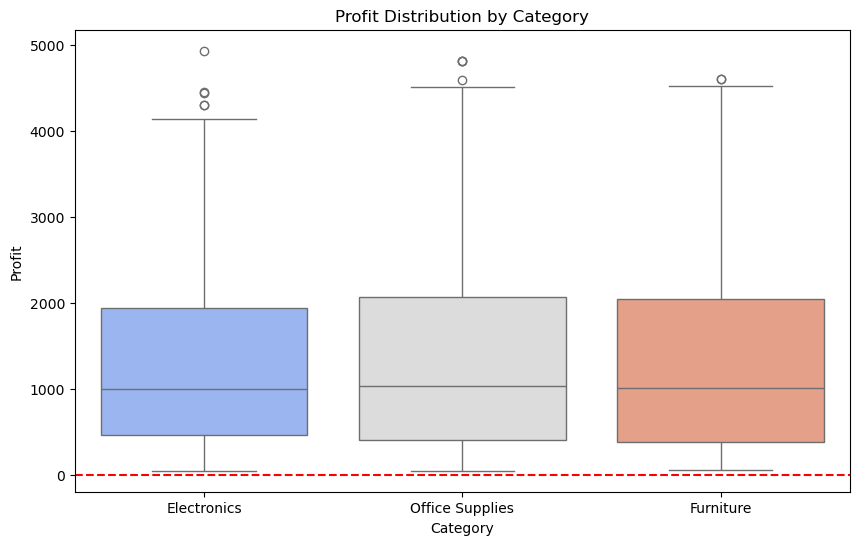

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(data=salesData, x='Category', y='Profit', palette='coolwarm')
plt.title('Profit Distribution by Category')
plt.ylabel('Profit')
plt.xlabel('Category')
plt.axhline(0, color='red', linestyle='--')
plt.show()

### Sales & Profit Overview
#### Total Sales & Profit by Category

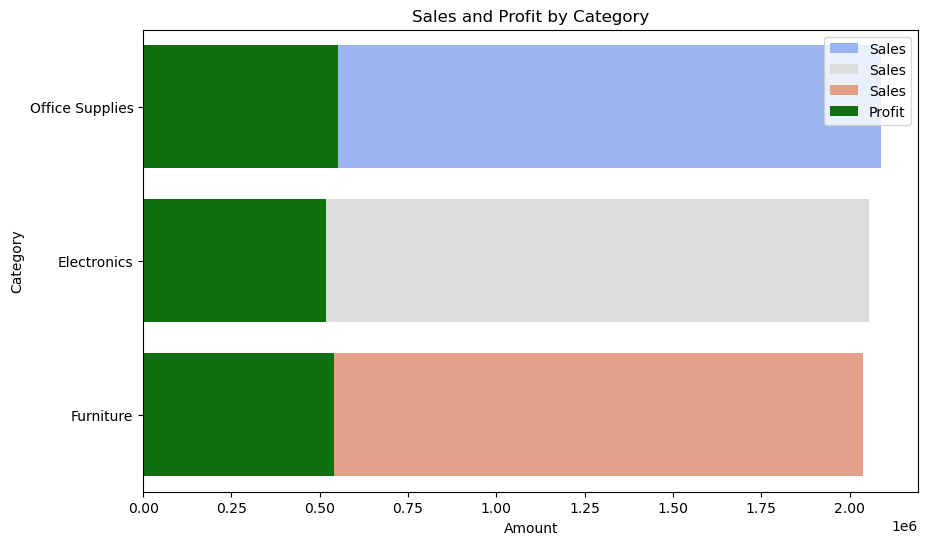

In [18]:
category_summary = salesData.groupby('Category')[['Amount', 'Profit']].sum().reset_index()
category_summary = category_summary.sort_values('Amount', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=category_summary, x='Amount', y='Category', palette='coolwarm', label='Sales')
sns.barplot(data=category_summary, x='Profit', y='Category', color='green', label='Profit')
plt.title('Sales and Profit by Category')
plt.xlabel('Amount')
plt.legend()
plt.show()

### Category vs Sub-Category Analysis

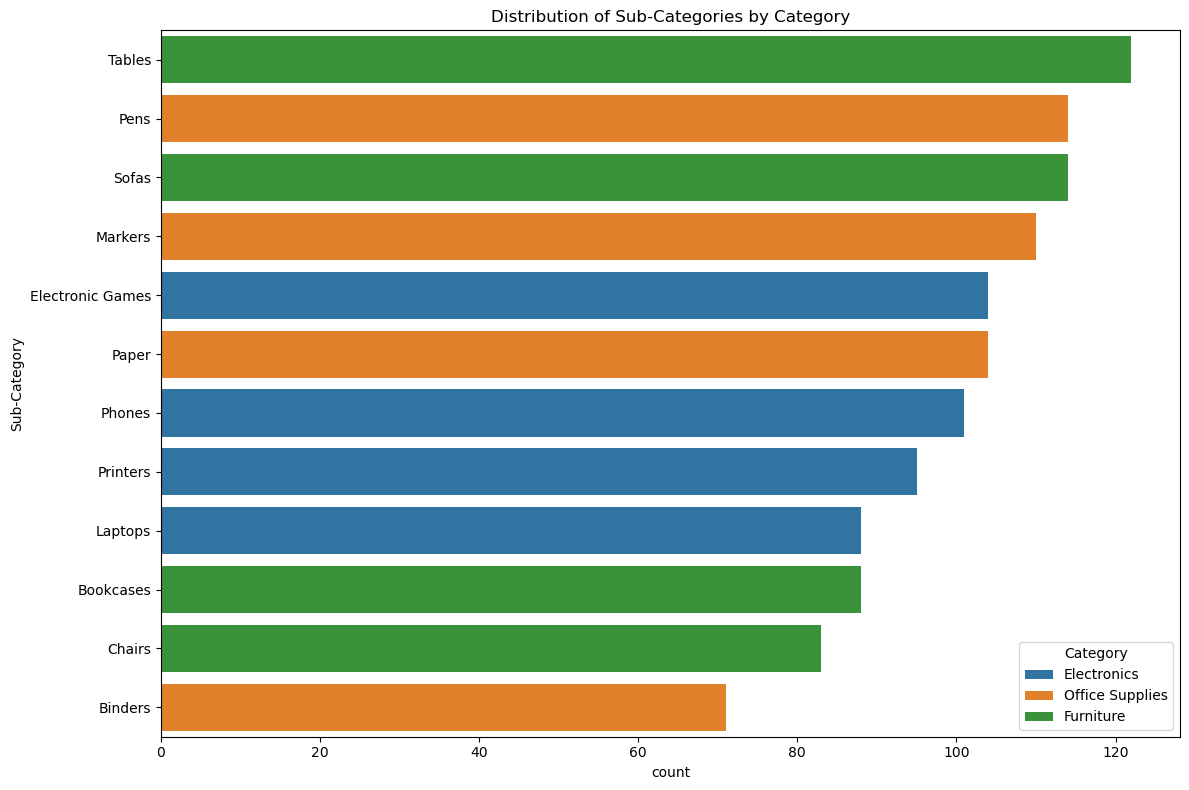

In [19]:
plt.figure(figsize=(12, 8))
category_order = salesData['Category'].value_counts().index
sns.countplot(data=salesData, y='Sub-Category', hue='Category', order=salesData['Sub-Category'].value_counts().index)
plt.title('Distribution of Sub-Categories by Category')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

### Profitability Heatmap
#### Profit by State and Category:

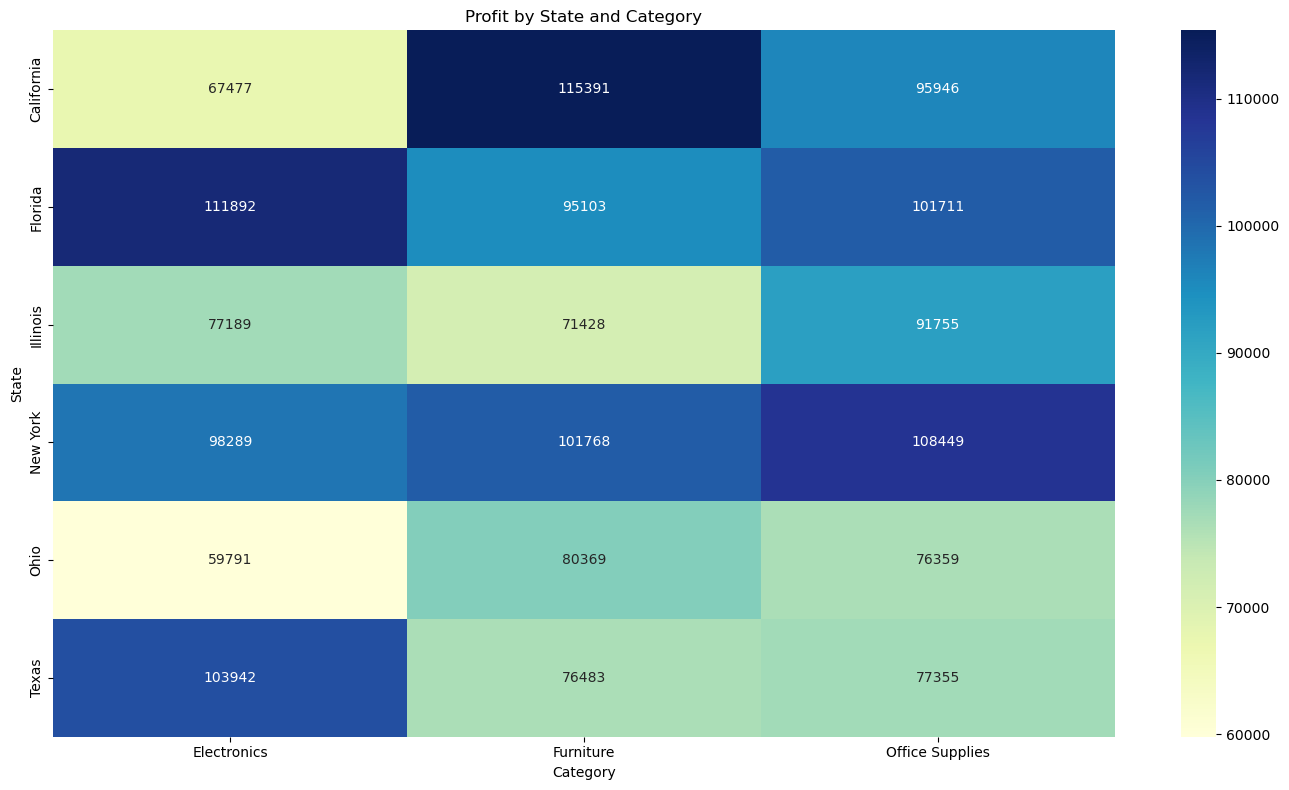

In [20]:
pivot_profit = salesData.pivot_table(index='State', columns='Category', values='Profit', aggfunc='sum')
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_profit, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Profit by State and Category')
plt.ylabel('State')
plt.xlabel('Category')
plt.tight_layout()
plt.show()

### Sales by Payment Mode

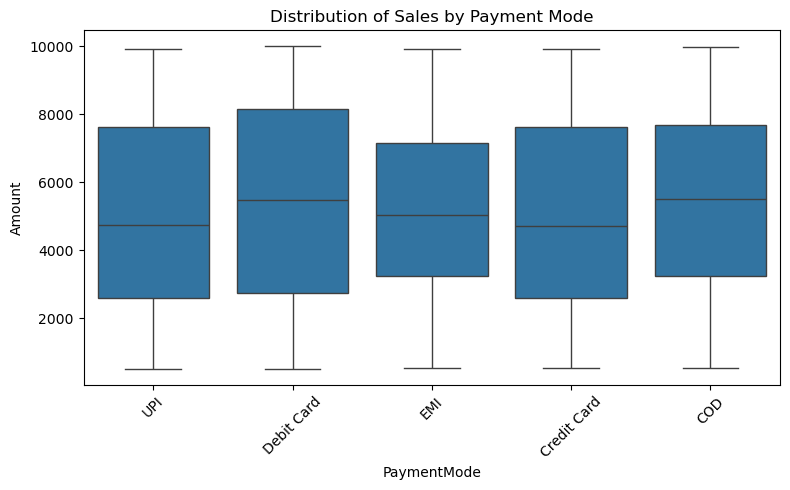

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=salesData, x='PaymentMode', y='Amount')
plt.title('Distribution of Sales by Payment Mode')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()